## Animation 2

The goal of this jupyter notebook is to create a function that takes in gameId, playId, and week as inputs and returns an animation of the selected play

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


In [2]:
#Lets first get all of our data into pandas dataframes


games = pd.read_csv('data/games.csv')
players = pd.read_csv('data/players.csv')
plays = pd.read_csv('data/plays.csv')
tackles = pd.read_csv('data/tackles.csv')
week1 = pd.read_csv('data/tracking_week_1.csv')
week2 = pd.read_csv('data/tracking_week_2.csv')
week3 = pd.read_csv('data/tracking_week_3.csv')
week4 = pd.read_csv('data/tracking_week_4.csv')
week5 = pd.read_csv('data/tracking_week_5.csv')
week6 = pd.read_csv('data/tracking_week_6.csv')
week7 = pd.read_csv('data/tracking_week_7.csv')
week8 = pd.read_csv('data/tracking_week_8.csv')
week9 = pd.read_csv('data/tracking_week_9.csv')


First lets make all left plays face right. Code courtesy of Colin Lagator's [Kaggle post](https://www.kaggle.com/code/colinlagator/make-all-plays-left-right).

#Split each week on the right facing and left facing plays
week1_left = week1[week1["playDirection"] == "left"]
week1_right = week1[week1["playDirection"] == "right"]

week2_left = week2[week2["playDirection"] == "left"]
week2_right = week2[week2["playDirection"] == "right"]

week3_left = week3[week3["playDirection"] == "left"]
week3_right = week3[week3["playDirection"] == "right"]

week4_left = week4[week4["playDirection"] == "left"]
week4_right = week4[week4["playDirection"] == "right"]

week5_left = week5[week5["playDirection"] == "left"]
week5_right = week5[week5["playDirection"] == "right"]

week6_left = week6[week6["playDirection"] == "left"]
week6_right = week6[week6["playDirection"] == "right"]

week7_left = week7[week7["playDirection"] == "left"]
week7_right = week7[week7["playDirection"] == "right"]

week8_left = week8[week8["playDirection"] == "left"]
week8_right = week8[week8["playDirection"] == "right"]

week9_left = week9[week9["playDirection"] == "left"]
week9_right = week9[week9["playDirection"] == "right"]



def reverse_deg(deg):
    if deg < 180:
        return deg + 180
    if deg >= 180:
        return deg - 180

def reverse_play_direction(df: pd.DataFrame):
        result_df = df.copy(deep=True)
        
        result_df["o"] = result_df["o"].apply(reverse_deg)
        
        result_df["dir"] = result_df["dir"].apply(reverse_deg)
        
        result_df["x"] = result_df["x"].apply(lambda x: 120 - x)
        
        result_df["y"] = result_df["y"].apply(lambda y: 160/3 - y)
        
        return result_df

#Apply the function to all the left plays in each week
week1_left_reversed = reverse_play_direction(week1_left)
week2_left_reversed = reverse_play_direction(week2_left)
week3_left_reversed = reverse_play_direction(week3_left)
week4_left_reversed = reverse_play_direction(week4_left)
week5_left_reversed = reverse_play_direction(week5_left)
week6_left_reversed = reverse_play_direction(week6_left)
week7_left_reversed = reverse_play_direction(week7_left)
week8_left_reversed = reverse_play_direction(week8_left)
week9_left_reversed = reverse_play_direction(week9_left)


#Concatenate right plays and newly reversed left plays
week1_std = pd.concat([week1_right, week1_left_reversed], ignore_index=True)
week2_std = pd.concat([week2_right, week2_left_reversed], ignore_index=True)
week3_std = pd.concat([week3_right, week3_left_reversed], ignore_index=True)
week4_std = pd.concat([week4_right, week4_left_reversed], ignore_index=True)
week5_std = pd.concat([week5_right, week5_left_reversed], ignore_index=True)
week6_std = pd.concat([week6_right, week6_left_reversed], ignore_index=True)
week7_std = pd.concat([week7_right, week7_left_reversed], ignore_index=True)
week8_std = pd.concat([week8_right, week8_left_reversed], ignore_index=True)
week9_std = pd.concat([week9_right, week9_left_reversed], ignore_index=True)

Now lets check if it worked by looking at dimensions and the actual values

print("Week 1 left facing plays\n",week1[week1["playDirection"] == "left"][['x','y','o']].head(15))
print(f"Week 1 has {week1.shape[1]} columns and {week1.shape[0]} rows")


print("Standardized week 1 left facing plays\n",week1_std[week1_std["playDirection"] == "left"][['x','y','o']].head(15))
print(f"Week 1 standardized has {week1_std.shape[1]} columns and {week1_std.shape[0]} rows")

Now let's work on the animation

In [3]:
pd.set_option('display.max_columns', None)
week1




,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,27.27,1.62,1.15,0.16,231.74,147.90,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.470000,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.560000,27.01,1.57,0.49,0.15,230.98,147.05,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.640000,26.90,1.44,0.89,0.14,232.38,145.42,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.720000,26.80,1.29,1.24,0.13,233.36,141.95,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407434,2022091200,3826,NaN,football,49,2022-09-12 23:05:57.799999,NaN,football,left,56.220001,9.89,2.56,1.25,0.25,NaN,NaN,tackle
1407435,2022091200,3826,NaN,football,50,2022-09-12 23:05:57.900000,NaN,football,left,56.060001,10.08,2.50,1.14,0.24,NaN,NaN,NaN
1407436,2022091200,3826,NaN,football,51,2022-09-12 23:05:58.000000,NaN,football,left,55.889999,10.27,2.38,1.70,0.25,NaN,NaN,NaN
1407437,2022091200,3826,NaN,football,52,2022-09-12 23:05:58.099999,NaN,football,left,55.730000,10.44,2.07,2.83,0.24,NaN,NaN,NaN


In [4]:
playId = 299
gameId = 2022090800
colors = {
    'ARI':"#97233F", 
    'ATL':"#A71930", 
    'BAL':'#241773', 
    'BUF':"#00338D", 
    'CAR':"#0085CA", 
    'CHI':"#C83803", 
    'CIN':"#FB4F14", 
    'CLE':"#311D00", 
    'DAL':'#003594',
    'DEN':"#FB4F14", 
    'DET':"#0076B6", 
    'GB':"#203731", 
    'HOU':"#03202F", 
    'IND':"#002C5F", 
    'JAX':"#9F792C", 
    'KC':"#E31837", 
    'LA':"#003594", 
    'LAC':"#0080C6", 
    'LV':"#000000",
    'MIA':"#008E97", 
    'MIN':"#4F2683", 
    'NE':"#002244", 
    'NO':"#D3BC8D", 
    'NYG':"#0B2265", 
    'NYJ':"#125740", 
    'PHI':"#004C54", 
    'PIT':"#FFB612", 
    'SEA':"#69BE28", 
    'SF':"#AA0000",
    'TB':'#D50A0A', 
    'TEN':"#4B92DB", 
    'WAS':"#5A1414", 
    'football':'#CBB67C'
}

In [5]:
plays

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,ATL,41,7:52,21,7,C,6.0,NaN,9,9,N,69,SHOTGUN,7.0,0.747284,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,PIT,34,7:38,14,20,NaN,NaN,NaN,3,3,N,76,SHOTGUN,7.0,0.416454,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,LV,30,8:57,10,3,C,11.0,NaN,15,15,N,40,I_FORM,6.0,0.267933,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,DEN,37,13:12,19,16,NaN,NaN,NaN,7,7,N,47,SINGLEBACK,6.0,0.592704,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,TEN,35,8:33,7,7,NaN,NaN,NaN,3,3,N,75,I_FORM,7.0,0.470508,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12481,2022100204,123,43293,Ezekiel Elliott,(13:31) E.Elliott right tackle to WAS 38 for 1...,1,1,10,DAL,WAS,WAS,39,13:31,0,0,NaN,NaN,NaN,1,1,N,49,SINGLEBACK,6.0,0.577800,0.638600,0.361400,-0.011542,0.011542,3.642571,-0.504018,NaN,NaN,NaN,NaN
12482,2022091200,3467,46189,Will Dissly,(6:08) G.Smith pass short right to W.Dissly to...,4,1,10,SEA,DEN,SEA,30,6:08,17,16,C,0.0,NaN,2,2,N,40,SINGLEBACK,7.0,0.298983,0.615241,0.384759,-0.025458,0.025458,1.434580,-0.444642,NaN,NaN,NaN,NaN
12483,2022101605,3371,44860,Joe Mixon,(9:35) (Shotgun) J.Mixon left end to CIN 47 fo...,4,1,10,CIN,NO,CIN,41,9:35,26,21,NaN,NaN,NaN,6,6,N,69,SHOTGUN,6.0,0.639439,0.667054,0.332946,-0.005164,0.005164,2.115356,0.203819,NaN,NaN,NaN,NaN
12484,2022100207,2777,52449,Jonathan Taylor,(2:02) (Shotgun) J.Taylor up the middle to TEN...,3,1,10,IND,TEN,TEN,34,2:02,17,24,NaN,NaN,NaN,-2,-2,N,44,SHOTGUN,6.0,0.518695,0.410611,0.589389,-0.046648,0.046648,3.946232,-0.976039,NaN,NaN,NaN,NaN


In [6]:
import plotly.graph_objects as go
import plotly.express as px

def plot_football_play(playId, gameId, week, plays, games, colors):
    # Filter the DataFrame for the specified playId and gameId
    selected_tracking = week[(week['playId'] == playId) & (week['gameId'] == gameId)]
    selected_play = plays[(plays['playId'] == playId) & (plays['gameId'] == gameId)]
    
    down = selected_play['down'].values[0]
    down_mapping = {
    1: "1st",
    2: "2nd",
    3: "3rd",
    4: "4th"
    }
    down_text = down_mapping.get(down, "Unknown")

    quarter = selected_play['quarter'].values[0]
    quarter_text = down_mapping.get(quarter, "Unknown")
    game_clock = selected_play['gameClock'].values[0]
    playDescription = selected_play['playDescription'].values[0]
    playDirection = selected_tracking['playDirection'].values[0]
    homeTeam = games.homeTeamAbbr.values[0]
    visitorTeam = games.visitorTeamAbbr.values[0]
    ballCarrierId = plays.ballCarrierId.values[0]

    #make the away team white
    modified_colors = colors.copy()
    modified_colors[visitorTeam] = "#FFFFFF"
    
    #Set line of scrimmage and first down
    #Offense on own half and going right
    if (selected_play['possessionTeam'].values[0] == selected_play['yardlineSide'].values[0] and playDirection == 'right'):
        line_of_scrimmage = selected_play['yardlineNumber'].values[0] + 10
        first_down_line = line_of_scrimmage + selected_play['yardsToGo'].values[0]
    #Offense on opponents half and going right
    elif (selected_play['possessionTeam'].values[0] != selected_play['yardlineSide'].values[0] and playDirection == 'right'):
        line_of_scrimmage = 110 - selected_play['yardlineNumber'].values[0]
        first_down_line = line_of_scrimmage + selected_play['yardsToGo'].values[0]
    #Offense on own half and going left
    elif (selected_play['possessionTeam'].values[0] == selected_play['yardlineSide'].values[0] and playDirection == 'left'):
        line_of_scrimmage = 110 - selected_play['yardlineNumber'].values[0]
        first_down_line = line_of_scrimmage - selected_play['yardsToGo'].values[0]
    #Offense on opponents half and going left
    elif (selected_play['possessionTeam'].values[0] == selected_play['yardlineSide'].values[0] and playDirection == 'left'):
        line_of_scrimmage = selected_play['yardlineNumber'].values[0] + 10
        first_down_line = line_of_scrimmage - selected_play['yardsToGo'].values[0]

    scorebug = f'{homeTeam} : {selected_play.preSnapHomeScore.values[0]} {visitorTeam} : {selected_play.preSnapVisitorScore.values[0]} || {quarter_text} {game_clock} || {down_text} and {selected_play.yardsToGo.values[0]}'

    # Create an animated scatter plot with Plotly Express
    scatter_fig = px.scatter(selected_tracking, x='x', y='y', animation_frame='frameId', color='club', color_discrete_map = modified_colors,
                     hover_data=['jerseyNumber', 'displayName', 's', 'event'],
                     title=playDescription)


    # Add football field shapes and annotations
    field_shapes = [
        dict(type='rect', x0=0, x1=10,y0=0,y1=53.3, fillcolor='blue', opacity=0.5),
        dict(type='rect', x0=110, x1=120,y0=0,y1=53.3, fillcolor='blue', opacity=0.5),
        dict(type='line', x0=line_of_scrimmage, x1=line_of_scrimmage,y0=0,y1=53.3, line=dict(color='blue')),
        dict(type='line', x0=first_down_line, x1=first_down_line,y0=0,y1=53.3, line=dict(color='yellow'))
    ]
    for x in range(10, 115, 5):
        field_shapes.append(dict(type='line', x0=x, x1=x, y0=0, y1=53.3, line=dict(color='white', width=1)))


    field_annotations = [
        dict(x=5, y=26.65,textangle=270, text=homeTeam, showarrow=False, font=dict(color='white', size=12)),
        dict(x=115, y=26.65,textangle=90, text=homeTeam, showarrow=False, font=dict(color='white', size=12)),
    ]

    for x in range(20, 70, 10):
        field_annotations.append(dict(x=x, y=8, text=(x-10), showarrow=False, font=dict(color='white', size=12)))
        field_annotations.append(dict(x=x, y=45.3, text=(x-10), showarrow=False, font=dict(color='white', size=12)))
    for x in range(70, 110, 10):
        field_annotations.append(dict(x=x, y=8, text=(110-x), showarrow=False, font=dict(color='white', size=12)))
        field_annotations.append(dict(x=x, y=45.3, text=(110-x), showarrow=False, font=dict(color='white', size=12)))

    title_annotation = dict(
    x=0.5,  # X-coordinate (0.5 is the center of the plot)
    y=-0.2,  # Y-coordinate (negative to position under the plot)
    xref='paper',
    yref='paper',
    text=scorebug,
    showarrow=False,
    font=dict(size=14, color='black')  # Customize the font size and color
    )
    
    # Create football field layout
    field_layout = go.Layout(
        shapes=field_shapes,
        annotations=field_annotations + [title_annotation],
        xaxis=dict(range=[0, 120], title =''),
        yaxis=dict(range=[0, 53.3], title=''),
        showlegend=True,
        height = 533,
        width = 1200
    )
    field_layout['xaxis'].update(showgrid=False)
    field_layout['yaxis'].update(showgrid=False)

    scatter_fig.update_layout(field_layout, plot_bgcolor='green')



    
    # Show the combined plot
    scatter_fig.show()







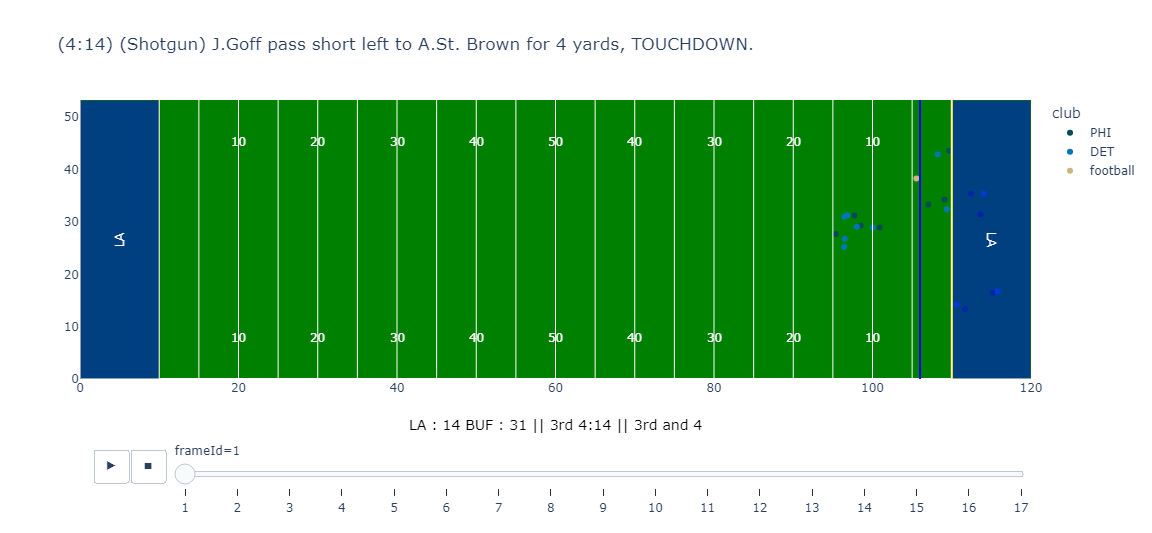

In [23]:
plot_football_play(3059, 2022091104, week1, plays, games, colors)
